<a href="https://colab.research.google.com/github/teteumac/ML_Alabama/blob/main/02_Training_linear_models_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2
Due date: 2022-02-09

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"02_Exercise2_Goup42_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/02_Training_linear_models.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

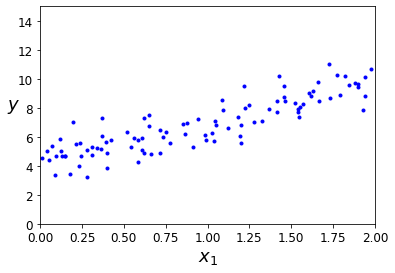

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Tasks 1-3

### Task 1
Fit a linear [regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `lin_reg` and print out its intercept and coefficient. 

In [4]:
from sklearn.linear_model import LinearRegression

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [5]:
lin_reg = LinearRegression() 
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

### Task 2 
With the model you created above, [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) the new values `X_new`.

In [6]:
X_new = np.array([[0], [2]])

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [7]:
y_predict = lin_reg.predict(X_new)
y_predict

array([[4.21509616],
       [9.75532293]])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

Let's plot the data (blue) and our predictions (red)

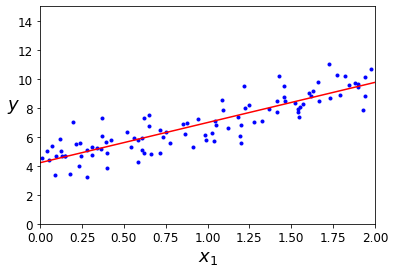

In [8]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", markersize = 20)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### Task 3
The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares").

Basically we fit to the form $y = 1 \Theta_0 + \Theta_1 x = x_b\cdot \Theta$ with $x_b = (1, x)^T$ and $\Theta = (\Theta_0, \Theta_1)^T$. So we need to add a 1 to each instance of `X`. See slide 13 of Lecture 4.

Look up [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html), call it directly on `X_b`, `y` and print out the $\Theta$ you found this way. Compare the output with the output from your `LinearRegression` model above. Set `rcond=1e-6` in `np.linalg.lstsq`.

In [9]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq( X_b, y, rcond=1e-6 )
print('theta_best_svd: ', theta_best_svd, '\n','residuals: ', residuals, '\n', 'rank:', rank, '\n', 's: ', s)
print('theta_best_svd gives the same parameters found in LinearRegression model.')

theta_best_svd:  [[4.21509616]
 [2.77011339]] 
 residuals:  [80.6584564] 
 rank: 2 
 s:  [14.37020392  4.11961067]
theta_best_svd gives the same parameters found in LinearRegression model.


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

In [11]:
# these are the values from the linear regression model
# compare them to what you got above
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

# Linear regression using batch gradient descent

Just click through this section.

The first part shows how to manually do gradient descent. The formula for the gradients has been calculated by hand and we just plug in `X` and `theta`.

The second part (function `plot_gradient_descent`) does the gradient descent and plots the first 10 steps.

[Here](https://github.com/Jaewan-Yun/optimizer-visualization) is a nice visualization of different gradient descent methods.

In [12]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # this line
        theta = theta - eta * gradients   # and this one
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, -10, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

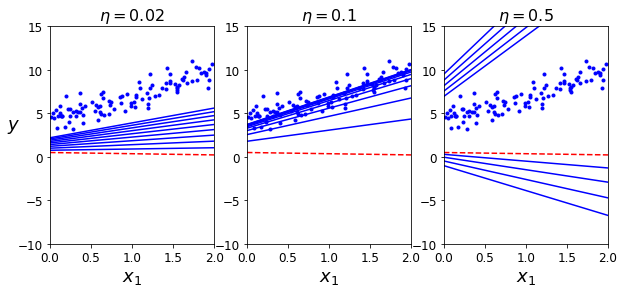

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
theta_path_bgd = []

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

For a learning rate $\eta$ that is too small we approach the minimum too slowly and for a too large learning rate we jump around the minimum like the purple curve in [this animation](https://github.com/Jaewan-Yun/optimizer-visualization/blob/master/figures/movie9.gif) from [this repo](https://github.com/Jaewan-Yun/optimizer-visualization) on GitHub.
Note that this animation does not correspond to our data.
![animation](https://github.com/Jaewan-Yun/optimizer-visualization/blob/master/figures/movie9.gif?raw=true) 

### Task 3.5 (Bonus)
Explain what happens in the two lines of code
```python
gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # this line
theta = theta - eta * gradients   # and this one
```
in the code above. Also explain where the first line comes from.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 3.5 (bonus) answer: The first line of the code calculates the gradient of minimum squared error. The second line updates the value of theta in the direction of MSE's minimum.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Stochastic Gradient Descent

This section shows how one can implement Stochastic Gradient Descent by hand.

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

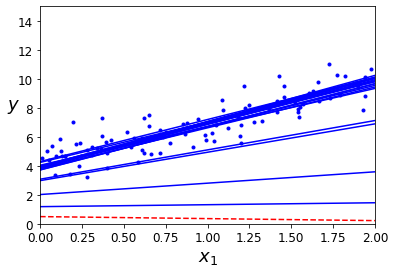

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20: 
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 

plt.plot(X, y, "b.") 
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) 
plt.show()

In [18]:
theta

array([[4.21076011],
       [2.74856079]])

### Task 4

- Fit an [SGD Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) `sgd_reg` to `X` and `y` and print out its intercept and coefficients. 
- Compare the values you find to the ones from the stochastic gradient descent above.

Use `max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42` as parameters for the SGD Regressor.

In [19]:
from sklearn.linear_model import SGDRegressor

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [20]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty = None, eta0=0.1, random_state=42)
sgd_reg.fit(X,y)
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.16782089]), array([2.72603052]))

In [21]:
print(theta)
print('These values are very similiar to the ones obtained above, as expected.')

[[4.21076011]
 [2.74856079]]
These values are very similiar to the ones obtained above, as expected.


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Mini-batch gradient descent

The following code shows how one could implement mini-batch gradient descent by hand. Can you find the difference to Stochastic gradient descent?

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

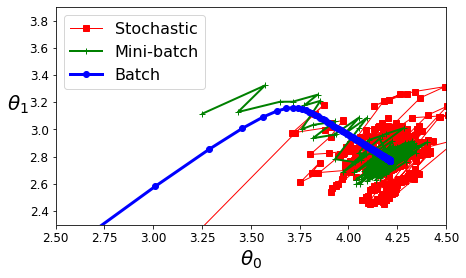

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

### Task 5
Explain which Linear Regression training algorithm you can use if you have a training set with millions of features? Why?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 5 answer: In that case, I would use the minibatch Linear Regression training algorithm because the batch algorithm may take too long time to train due to the large numbers of features and the stochastic algorithm will use only one instance at time, which may not represents well the whole set, taking too many epochs to profit the training.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Polynomial regression

In [26]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

With a little trick Linear Regression turns out to be rather powerful also for data that is not linear!
The trick is to add "new features" to `X`. In our case we need a second feature that is just $x^2$. Then we fit again, but because our feature vector is now $(1, x, x^2)$, the dot product with $(\Theta_0, \Theta_1, \Theta_2)$ gives the form for the parabola (check this if you don't see it!).

Here we show an example of how to fit a parabola with Linear Regression.

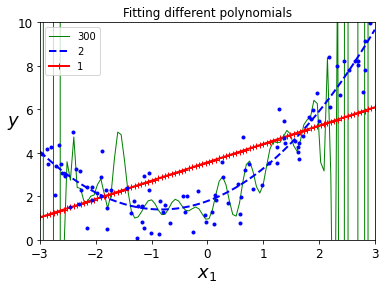

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Fitting different polynomials")
plt.axis([-3, 3, 0, 10])
plt.show()

### Task 6
- Which curve (red, blue, green) fits the data (blue dots) the best?
- Explain what happens to the green curve.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 6 answer: The blue curve fits better the data, while the green curve is overfitting it.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Training and Validation Error

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Let's compare different degrees of polynomials for fitting:

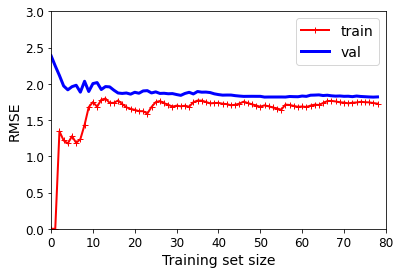

In [29]:
# Linear Regression (degree 1)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()                                     

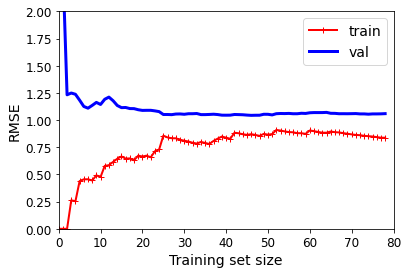

In [30]:
from sklearn.pipeline import Pipeline

# Degree 2
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=True)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 2])           
plt.show()                        

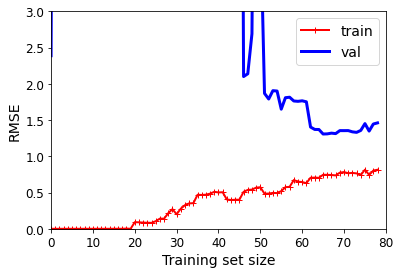

In [31]:
# Degree 20
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=True)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

### Task 7
Look at the three plots above that show the training and validation errors for linear regression, quadratic regression and order 20. Compare them to the plot above called "Fitting different polynomials".

Describe which one is likely overfitting and which one is likely underfitting and why. 

Hint: Also take the values of the errors into consideration when comparing the different polynomials and not just the shape of the train and validation loss.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 7 answer: "The degree 1 curve is underfitting the curve and the degree 20 curve is overfitting it. It is importanto to look the value of the error in the degree 2 case because it is lower (~1.0) when compared with the two other cases."

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Regularized models

In [32]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + X*X + 1.5 * np.random.randn(m, 1) / 2
X_new = np.linspace(0, 3, 1000).reshape(1000, 1)

### Task 8
Fit (`.fit`) a [ridge linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with `alpha=1` and Stochastic Average Gradient descent (`solver="sag"`) solver to `X` and `y`. Check which value it predicts (`.predict`) for `X=[[1.5]]`.

In [33]:
from sklearn.linear_model import Ridge

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [34]:
ridge_reg_sag = Ridge(alpha=1, solver="sag")
ridge_reg_sag.fit(X,y)
ridge_reg_sag.predict([[1.5]])

array([[3.83287656]])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

Now we fit a linear model (left plot) and a degree 15 polynomial model (right plot) with ridge regression for different values of alpha.

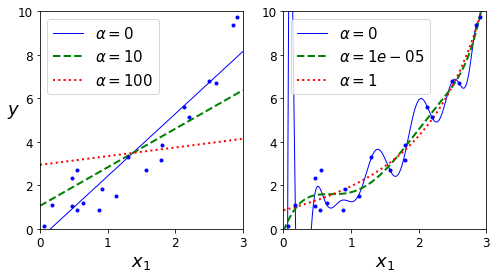

In [35]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 10])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

### Task 9
- Describe the effect of the regularization parameter alpha in the plot on the right hand side.
- Which curve (blue, green, red) would you expect to have the smallest training loss?
- Which curve would you expect to generalize the best to new data?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 7 answer: The regularization parameter in the right hand figure decrease the overfitting as the parameter is bigger. The training loss is small in the blue curve, but it is not the curve that better generalize the new data. This curve is the green one. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

In [36]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.95689619])

The same, but with Lasso:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.442e+00, tolerance: 1.539e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


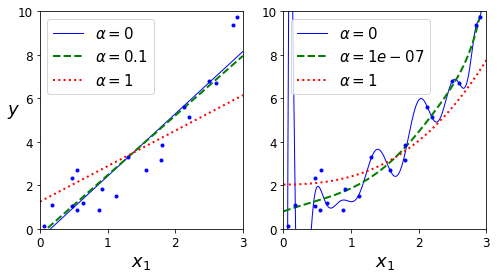

In [37]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

### Task 10
Fit a Lasso linear model with `alpha=1`. Check which value it predicts for `X=[[1.5]]`.

In [38]:
from sklearn.linear_model import Lasso

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [39]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.6972954])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

## Early stopping example

In [40]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [41]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

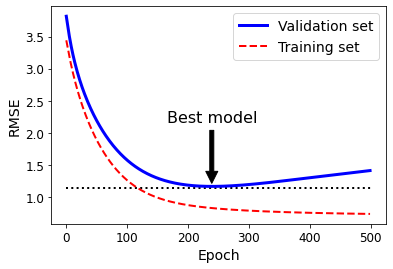

In [42]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

### Task 11
Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on?
What would be options for fixing this?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 11 answer: Probably the model is very complex. One ideia to fix it is regularizating the model or reduce its complexity in the hyperparemeters structure. Another way to get around the problem is to increase the number of events 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

### Task 12
We want to find at which exact epoch our model is the best.
For that we go through 1000 "epochs".

We have already prepared part of the code for this task. You only have to fill in the last part which should do the following:

- if the validation error (of the current epoch) is smaller than the smalles validation error until now (`minimum_val_error`), then:
    - set the `minimum_val_error` to be the current validation error
    - set the `best_epoch` to be the current epoch
    - set the `best_model` to be the current model (`clone(sgd_reg)`)
- else: next epoch (you can also just leave out `else`)

In [43]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    # ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below
    if (val_error < minimum_val_error):
      minimum_val_error = val_error
      best_epoch = epoch
      best_model = clone(sgd_reg)
    # ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this
    
print("Best epoch: ", best_epoch)

Best epoch:  239


Task 12.5 bonus question: Why do we need `clone(sgd_reg)` here and not just `sgd_reg`?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 12.5 (bonus) answer: Following the documentation, the method 'clone' "construct a new unfitted estimator with the same parameters.
Clone does a deep copy of the model in an estimator without actually copying attached data. It returns a new estimator with the same parameters that has not been fitted on any data." 
So it is used to copy the model parameters structure, but as an unfitted model.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

# Logistic regression

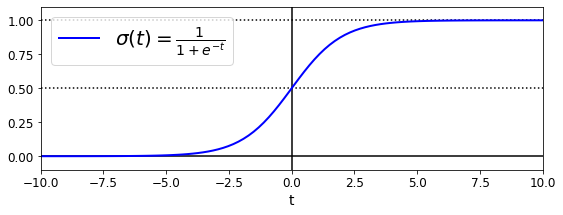

In [44]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

From here on we will work with the [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [45]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let's only use one feature: The petal width

In [47]:
X = iris["data"][:, 3:]  # petal width only
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


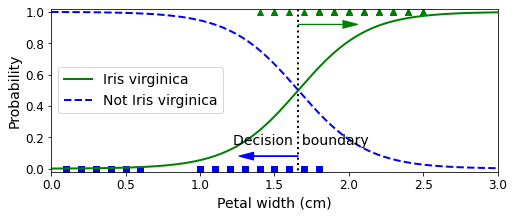

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [50]:
decision_boundary

array([1.66066066])

The decision boundary is at Petal width = 1.66cm.
Let's see what we get if we predict the class of an instance slightly to the left (1.5) and one slightly to the right (1.7).

In [51]:
# if you are motivated: Try to understand this output
log_reg.predict_proba([[1.7], [1.5]])

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Task 13
What is the class prediction (iris virginica or not iris virginica?) for petal width = 1.7 and what is the prediction for petal width = 1.5? (easy)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 13 answer: For petal width = 1.7, the prediction is "iris virginica". For petal width = 1.5, the prediction is "not iris virginica".

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

Now let's use two features for predicting the class:
The petal length and the petal width.
We also use all classes this time and not just two like above.

## Extension to 2 dimensions
There are no tasks for this part. You can try to understand what happens or skip if you want.

In [53]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

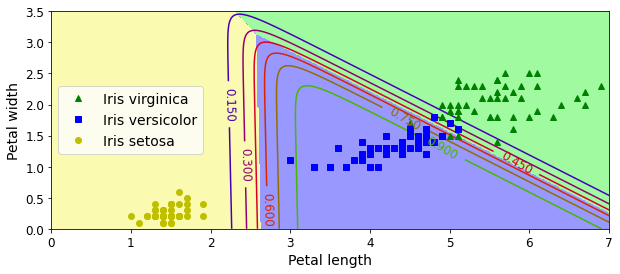

In [54]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [55]:
softmax_reg.predict([[5, 2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## General Questions

### Task 14
Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 14 answer: As the Gradient Descendet produces a convex shaped graph which only has one global optimum, it cannot get stuck in a local minimum.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this

### Task 15
Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 15 answer: The fastest algorithm to converge is stochastic gradient because it only considers one training example at time. Batch gradient descent is guarenteed to converge given a small enough learning rate and some patience because it doesn't have random parameters, the way is straghtforward. Since stochastic and mini=batch are both random, one strategy induce them convergence is to reduce the learning rate over time, so it takes smaller steps of gradient descent as it approaches the global minimum, that avoids bumping.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this